       Unnamed: 0   Cites                                            Authors  \
7311       8003.0   936.0                 Cédric Feschotte, Ellen J. Pritham   
16024     17163.0   772.0  Marina Konopleva, Daniel A. Pollyea, Jalaja Po...   
16033     17172.0   281.0  Milind Javle, Tanios Bekaii‐Saab, Apurva Jain,...   
8895       9708.0  2521.0  Mark S. Slaughter, Joseph G. Rogers, Carmelo A...   
11522     12501.0   246.0  David Crews, Ross Gillette, Samuel V. Scarpino...   
11644     12625.0   412.0  Eli J. Finkel, Paul W. Eastwick, Benjamin R. K...   
13990     15060.0   116.0  David T. Allen, Adam P. Pacsi, David W. Sulliv...   
8824       9629.0   966.0  Ian M. Thompson, Catherine M. Tangen, Jorge Pa...   
3541       3839.0   607.0  Charles B. Nemeroff, Christine M. Heim, Michae...   
23262      3660.0  2181.0  Bruce D. Cheson, John M. Bennett, Kenneth J. K...   
1470       1576.0   329.0  Kevin D. Tipton, Blake B. Rasmussen, Sharon L....   
541         573.0   366.0  Blake B. Rasm

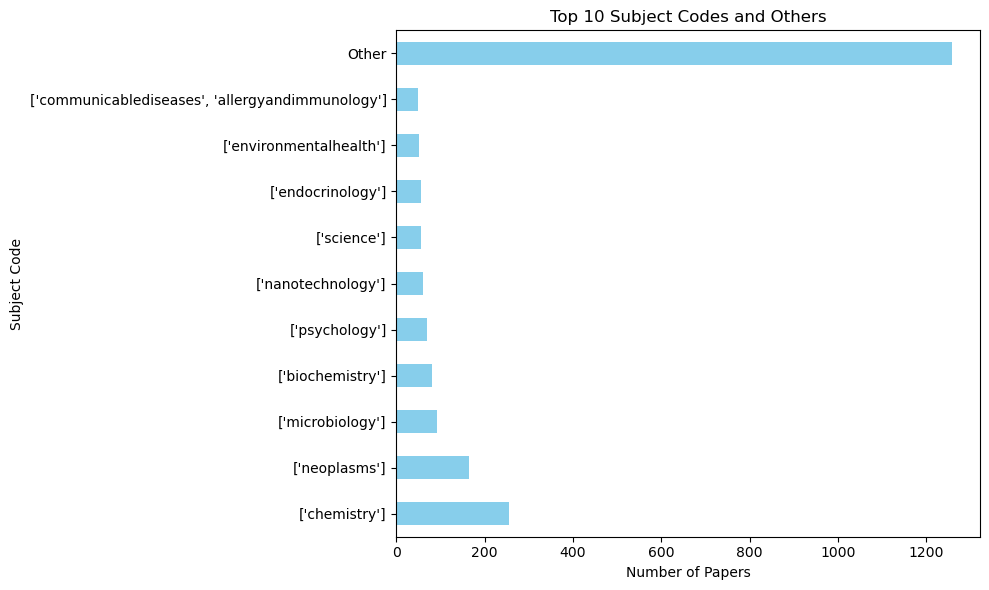

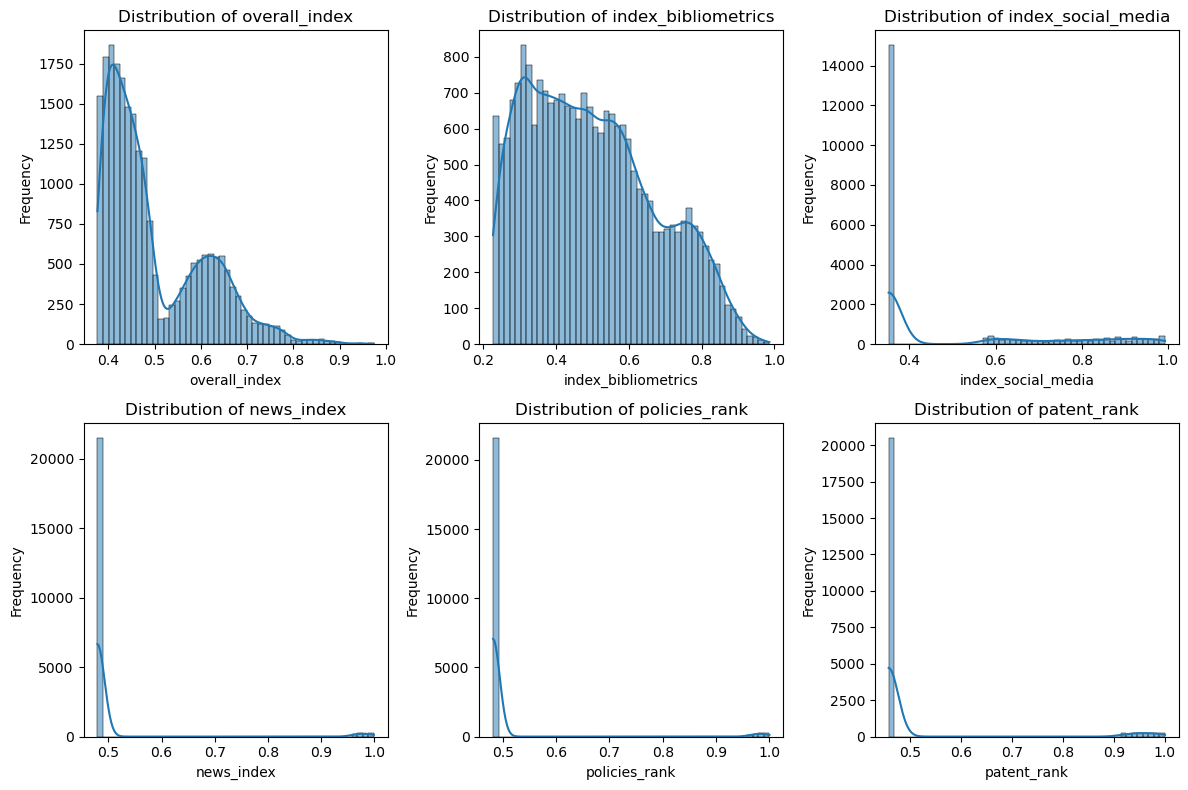

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'cleaned_merged_dataset.csv'  # Update this with the correct file path
dataset = pd.read_csv(file_path)

# 1. Address the first concern: Incorporating Wikipedia cites and potential indicators of awards/badges
# Ensure necessary columns exist or create them if needed

# Calculating per-year metrics for the additional columns identified
dataset["Cites_per_year"] = dataset["Cites"] / (2024 - dataset["Year"])
dataset["readers_count_per_year"] = dataset["readers_count"] / (2024 - dataset["Year"])
dataset["tweets_per_year"] = dataset["cited_by_tweeters_count"] / (2024 - dataset["Year"])
dataset["posts_per_year"] = dataset["cited_by_posts_count"] / (2024 - dataset["Year"])
dataset["accounts_per_year"] = dataset["cited_by_accounts_count"] / (2024 - dataset["Year"])
dataset["wikipedia_per_year"] = dataset["cited_by_wikipedia_count"] / (2024 - dataset["Year"])
dataset["msm_per_year"] = dataset["cited_by_msm_count"] / (2024 - dataset["Year"])
dataset["patent_per_year"] = dataset["cited_by_patents_count"] / (2024 - dataset["Year"])
dataset["policies_per_year"] = dataset["cited_by_policies_count"] / (2024 - dataset["Year"])

# Rank the metrics to create percentile ranks
dataset["Cites_rank"] = dataset["Cites_per_year"].rank(pct=True)
dataset["readers_count_rank"] = dataset["readers_count_per_year"].rank(pct=True)
dataset["tweets_rank"] = dataset["tweets_per_year"].rank(pct=True)
dataset["posts_rank"] = dataset["posts_per_year"].rank(pct=True)
dataset["accounts_rank"] = dataset["accounts_per_year"].rank(pct=True)
dataset["wikipedia_rank"] = dataset["wikipedia_per_year"].rank(pct=True)
dataset["msm_rank"] = dataset["msm_per_year"].rank(pct=True)
dataset["patent_rank"] = dataset["patent_per_year"].rank(pct=True)
dataset["policies_rank"] = dataset["policies_per_year"].rank(pct=True)
dataset["GSRank_rank"] = dataset["GSRank"].rank(pct=True)
dataset["score_rank"] = dataset["score"].rank(pct=True)

# 2. Calculate indices incorporating the new ranks
# Bibliometrics index including Wikipedia cites and possible badges indicators (score, GSRank)
dataset["index_bibliometrics"] = (
    0.4 * dataset["Cites_rank"] +
    0.2 * dataset["readers_count_rank"] +
    0.1 * dataset["wikipedia_rank"] +
    0.1 * dataset["score_rank"] +
    0.1 * dataset["GSRank_rank"] +
    0.1 * dataset["patent_rank"]
)

# Social media index
dataset["index_social_media"] = (
    (1/3) * dataset["tweets_rank"] +
    (1/3) * dataset["posts_rank"] +
    (1/3) * dataset["accounts_rank"]
)

# News media index
dataset["news_index"] = dataset["msm_rank"]

# Overall index incorporating all the components
dataset["overall_index"] = (
    0.3 * dataset["index_bibliometrics"] +
    0.2 * dataset["index_social_media"] +
    0.2 * dataset["news_index"] +
    0.2 * dataset["policies_rank"] +
    0.1 * dataset["patent_rank"]
)

# 3. Pull the top 20 papers by overall index
top_20_papers = dataset.nlargest(20, "overall_index")

# Display the top 20 papers
print(top_20_papers)

# 4. Analyze patterns/biases using subject codes
# Define how many top subject codes to display
top_n = 10

# Get the top N subject codes and aggregate the rest into "Other"
top_subjects = dataset['subjects'].value_counts().nlargest(top_n)
other_count = dataset['subjects'].value_counts().iloc[top_n:].sum()

# Create a new series that includes the top N subjects and 'Other'
subject_counts = pd.concat([top_subjects, pd.Series({'Other': other_count})])

# Plot the distribution with a horizontal bar plot
plt.figure(figsize=(10, 6))
subject_counts.plot(kind='barh', color='skyblue')
plt.title(f'Top {top_n} Subject Codes and Others')
plt.xlabel('Number of Papers')
plt.ylabel('Subject Code')
plt.tight_layout()
plt.show()

# 5. Check the distribution of the overall index and sub-indices
indices = ['overall_index', 'index_bibliometrics', 'index_social_media', 'news_index', 'policies_rank', 'patent_rank']

# Plot the distributions
plt.figure(figsize=(12, 8))
for i, index in enumerate(indices):
    plt.subplot(2, 3, i+1)
    sns.histplot(dataset[index], kde=True, bins=50)
    plt.title(f'Distribution of {index}')
    plt.xlabel(index)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
